In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from cameo.core import manipulation
from cameo import fba, flux_variability_analysis
from cobra.io import read_sbml_model

In [3]:
# fix the FSEOF import errors
from collections.abc import Mapping

from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [4]:
model = read_sbml_model('Models/yeast8.xml')

In [5]:
fseof = FSEOF(model)

In [8]:
sim=fseof.run(target=model.reactions.get_by_id("r_1180"))
df=sim.data_frame;
df

,1,2,3,4,5,6,7,8,9,10
r_0023,-0.075700,-0.123506,-0.171312,-0.219118,-0.266924,-0.314730,-0.362469,-0.409860,-0.456973,-0.504071
r_0025,0.075700,0.123506,0.171312,0.219118,0.266924,0.314730,0.362469,0.409860,0.456973,0.504071
r_0029,0.075700,0.123506,0.171312,0.219118,0.266924,0.314730,0.362469,0.409860,0.456973,0.504071
r_0060,-0.075700,-0.123506,-0.171312,-0.219118,-0.266924,-0.314730,-0.362469,-0.409860,-0.456973,-0.504071
r_0061,0.075700,0.123506,0.171312,0.219118,0.266924,0.314730,0.362469,0.409860,0.456973,0.504071
...,...,...,...,...,...,...,...,...,...,...
r_3999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000090,0.000000,0.000000,0.000000
r_4216,-0.000001,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
r_4264,2.054250,1.708818,1.363386,1.037303,0.711795,0.386288,0.155838,0.145002,0.171512,0.197139
r_4484,0.004383,0.003995,0.003606,0.003218,0.002830,0.002441,0.002041,0.001582,0.001075,0.000566


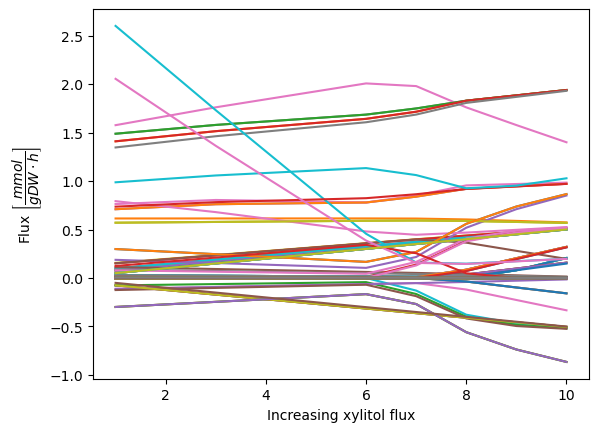

In [9]:
from matplotlib import pyplot as plt
plt.plot(df.T);
plt.xlabel("Increasing isoamyl acetate flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

## Downregulation targets

To find downregulation targets we want to look at reactions that decrease in flux as isoamyl acetate flux increases. So we weed out those values. We also want a significant change in flux, a significant flux overall and ignore values that have no flux to start with (which is done with the code below). Since there are many reactions, it is prudent for this analysis to exclude a lot of the less significant ones. This is done to find the most impactful reactions. When designing a cell factory it is not easy to make a lot of changes. This analysis is not sourced from publications, however an experimentally validated analysis is done in the next section.

In [10]:
Keys = []
for row in range(len(df[1])):
        if df[1][row]==0.0:
            continue
        elif df[1][row]>df[10][row] and abs(df[1][row]-df[10][row])/abs(df[1][row])>2.0 and df[1][row]-df[10][row]>0.1:
            Keys.append(df.index[row])
Reactions_down=df.T[Keys].T.sort_values(by=[10])
Reactions_down

C:\Users\pauli\AppData\Local\Temp\ipykernel_52256\3861274369.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df[1][row]==0.0:
C:\Users\pauli\AppData\Local\Temp\ipykernel_52256\3861274369.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df[1][row]>df[10][row] and abs(df[1][row]-df[10][row])/abs(df[1][row])>2.0 and df[1][row]-df[10][row]>0.1:


,1,2,3,4,5,6,7,8,9,10
r_1126,-0.124107,-0.113112,-0.102116,-0.091121,-0.080125,-0.069130,-0.187347,-0.417198,-0.495187,-0.524184
r_0714,-0.076029,-0.069293,-0.062558,-0.055822,-0.049086,-0.042350,-0.164954,-0.399843,-0.483392,-0.517976
r_0023,-0.075700,-0.123506,-0.171312,-0.219118,-0.266924,-0.314730,-0.362469,-0.409860,-0.456973,-0.504071
r_0060,-0.075700,-0.123506,-0.171312,-0.219118,-0.266924,-0.314730,-0.362469,-0.409860,-0.456973,-0.504071
r_1574,-0.075700,-0.123506,-0.171312,-0.219118,-0.266924,-0.314730,-0.362469,-0.409860,-0.456973,-0.504071
r_1864,-0.050076,-0.100153,-0.150229,-0.200305,-0.250381,-0.300458,-0.350534,-0.400610,-0.450686,-0.500763
r_1965,-0.005940,-0.005414,-0.004887,-0.004361,-0.003835,-0.003309,-0.000018,-0.036269,-0.097608,-0.158242
r_0503,-0.005926,-0.005401,-0.004876,-0.004351,-0.003826,-0.003301,-0.000011,-0.036263,-0.097605,-0.158240
r_2045,-0.005926,-0.005401,-0.004876,-0.004351,-0.003826,-0.003301,-0.000011,-0.036263,-0.097605,-0.158240


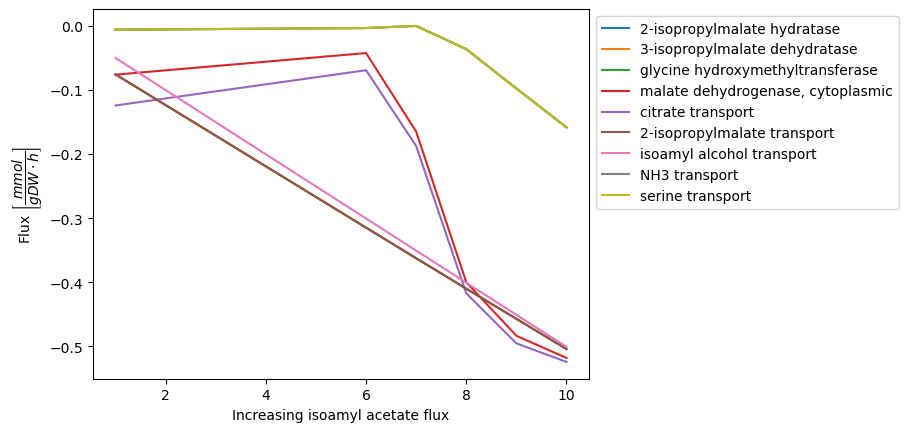

In [11]:
for k in Keys:
    plt.plot(Reactions_down.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing isoamyl acetate flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

In [12]:
for id in Reactions_down.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions_down.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

citrate transport r_1126, final flux: -0.524184
(S)-malate + citrate ==> (S)-malate + citrate

malate dehydrogenase, cytoplasmic r_0714, final flux: -0.517976
(S)-malate + NAD ==> H+ + NADH + oxaloacetate

2-isopropylmalate hydratase r_0023, final flux: -0.504071
2-isopropylmaleic acid + H2O ==> 2-isopropylmalate

3-isopropylmalate dehydratase r_0060, final flux: -0.504071
(2R,3S)-3-isopropylmalate ==> 2-isopropylmaleic acid + H2O

2-isopropylmalate transport r_1574, final flux: -0.504071
2-isopropylmalate ==> 2-isopropylmalate

isoamyl alcohol transport r_1864, final flux: -0.500763
isoamylol ==> isoamylol

NH3 transport r_1965, final flux: -0.158242
ammonium ==> ammonium

glycine hydroxymethyltransferase r_0503, final flux: -0.15824
L-serine + THF ==> 5,10-methylenetetrahydrofolate + H2O + L-glycine

serine transport r_2045, final flux: -0.15824
L-serine ==> L-serine



## Overexpression targets

In [13]:
Keys = []
for row in range(len(df[1])):
        if df[1][row]==0.0:
            continue
        elif df[1][row]<df[10][row] and abs(df[10][row]-df[1][row])/abs(df[10][row])>0.95 and df[10][row]-df[1][row]>0.1:
            Keys.append(df.index[row])
Reactions_up=df.T[Keys].T.sort_values(by=[10])
Reactions_up

C:\Users\pauli\AppData\Local\Temp\ipykernel_52256\4259172328.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df[1][row]==0.0:
C:\Users\pauli\AppData\Local\Temp\ipykernel_52256\4259172328.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df[1][row]<df[10][row] and abs(df[10][row]-df[1][row])/abs(df[10][row])>0.95 and df[10][row]-df[1][row]>0.1:
C:\Users\pauli\AppData\Local\Temp\ipykernel_52256\4259172328.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  elif df[1][row]<df[10][row] and abs(df[10][row]-df[1][row])/abs(df[10][row])>0.95 and df[10][row]-df[1][row]>0.1:


,1,2,3,4,5,6,7,8,9,10
r_0506,0.005940,0.005414,0.004887,0.004361,0.003835,0.003309,0.000018,0.036269,0.097608,0.158242
r_0507,0.005940,0.005414,0.004887,0.004361,0.003835,0.003309,0.000018,0.036269,0.097608,0.158242
r_0508,0.005940,0.005414,0.004887,0.004361,0.003835,0.003309,0.000018,0.036269,0.097608,0.158242
r_0491,0.005228,0.004765,0.004302,0.003839,0.003375,0.002912,0.002435,0.001887,0.081485,0.206805
r_1811,0.011865,0.010814,0.009763,0.008712,0.007660,0.006609,0.000029,0.072532,0.195213,0.316483
r_0719,0.019369,0.017653,0.015937,0.014221,0.012505,0.010789,0.138563,0.385404,0.473577,0.512811


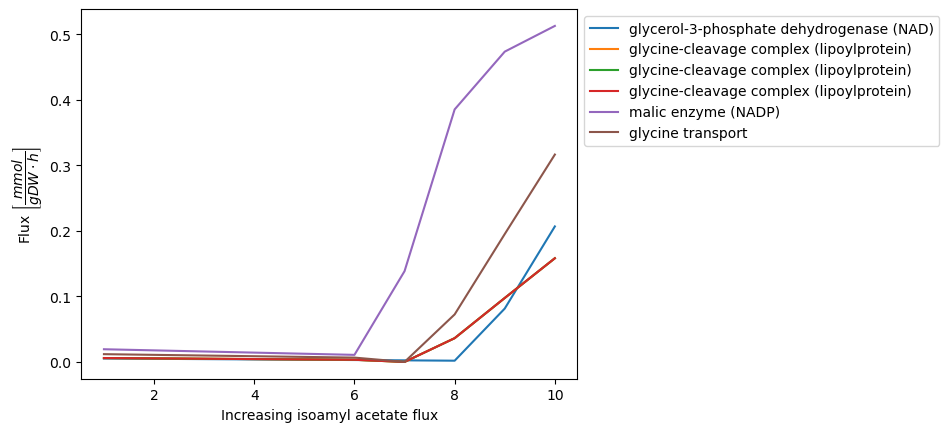

In [14]:
for k in Keys:
    plt.plot(Reactions_up.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing isoamyl acetate flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

In [15]:
for id in Reactions_up.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions_up.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

glycine-cleavage complex (lipoylprotein) r_0506, final flux: 0.158242
L-glycine + lipoylprotein ==> carbon dioxide + S(8)-aminomethyldihydrolipoylprotein

glycine-cleavage complex (lipoylprotein) r_0507, final flux: 0.158242
H+ + S(8)-aminomethyldihydrolipoylprotein + THF ==> 5,10-methylenetetrahydrofolate + ammonium + dihydrolipoylprotein

glycine-cleavage complex (lipoylprotein) r_0508, final flux: 0.158242
dihydrolipoylprotein + NAD ==> H+ + lipoylprotein + NADH

glycerol-3-phosphate dehydrogenase (NAD) r_0491, final flux: 0.206805
dihydroxyacetone phosphate + H+ + NADH ==> glycerol 3-phosphate + NAD

glycine transport r_1811, final flux: 0.316483
L-glycine ==> L-glycine

malic enzyme (NADP) r_0719, final flux: 0.512811
(S)-malate + NADP(+) ==> carbon dioxide + NADPH + pyruvate

